# Prediction using Supervised ML
## Predict the percentage of a student based on the no of study hours.

### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the data from the given  link.

In [2]:
data=pd.read_csv('http://bit.ly/w-data')


### Some pandas dataframe methods to analyze datasets.

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Lets see the hours and scores have some type of correlation or not.

Text(0.5, 1.0, 'Hours Vs Scores Graph')

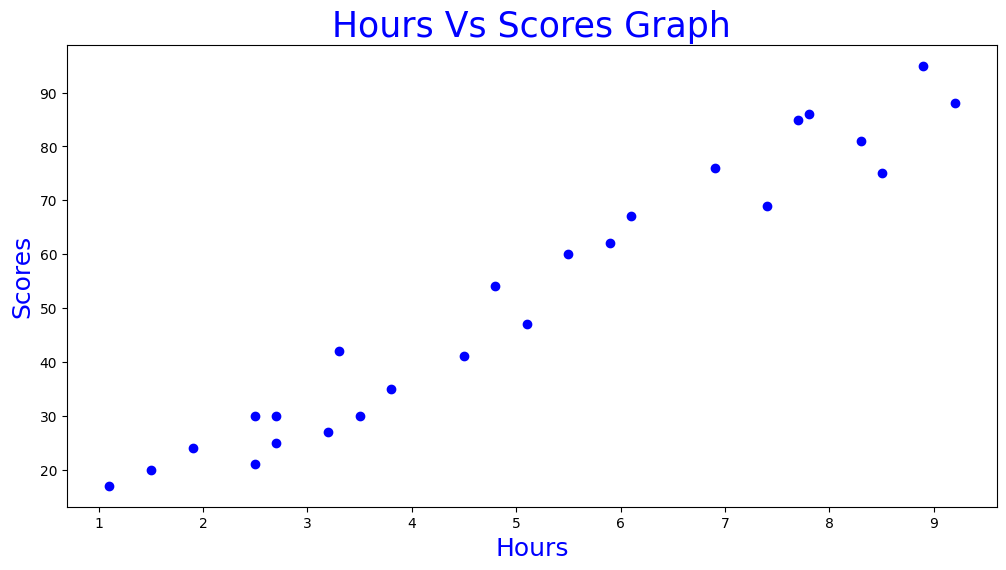

In [10]:
X=data['Hours']
y=data['Scores']
plt.figure(figsize=(12,6))
plt.scatter(X,y, color="blue")
plt.xlabel("Hours", fontdict={"color":"blue","fontsize":18})
plt.ylabel("Scores", fontdict={"color":"blue", "fontsize":18})
plt.title("Hours Vs Scores Graph", fontdict={"color":"blue","fontsize":25})

This graph show that there is postive linear regression between the hours studied and scores obtained.

### Spliting the datasets. Before using any machine learning model first we split the datasets into training and testing data. The training datasets are used to train the model and testing datasets is used to test the model.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=13)


In [12]:
X_train

0     2.5
21    4.8
4     3.5
9     2.7
22    3.8
5     1.5
20    2.7
14    1.1
19    7.4
3     8.5
12    4.5
2     3.2
6     9.2
23    6.9
10    7.7
16    2.5
18    6.1
Name: Hours, dtype: float64

In [13]:
X_train=np.array(X_train).reshape(-1,1)
X_train

array([[2.5],
       [4.8],
       [3.5],
       [2.7],
       [3.8],
       [1.5],
       [2.7],
       [1.1],
       [7.4],
       [8.5],
       [4.5],
       [3.2],
       [9.2],
       [6.9],
       [7.7],
       [2.5],
       [6.1]])

In [14]:
X_test=np.array(X_test).reshape(-1,1)

### Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Predictions: X_train

In [16]:
y_predict_train=lr.predict(X_train)
y_predict_train

array([26.17429031, 48.15726119, 35.73210374, 28.085853  , 38.59944777,
       16.61647688, 28.085853  , 12.79335151, 73.0075761 , 83.52117087,
       45.28991716, 32.86475971, 90.21164027, 68.22866939, 75.87492013,
       26.17429031, 60.58241865])

Text(0.5, 1.0, 'Hours Vs Scores Graph')

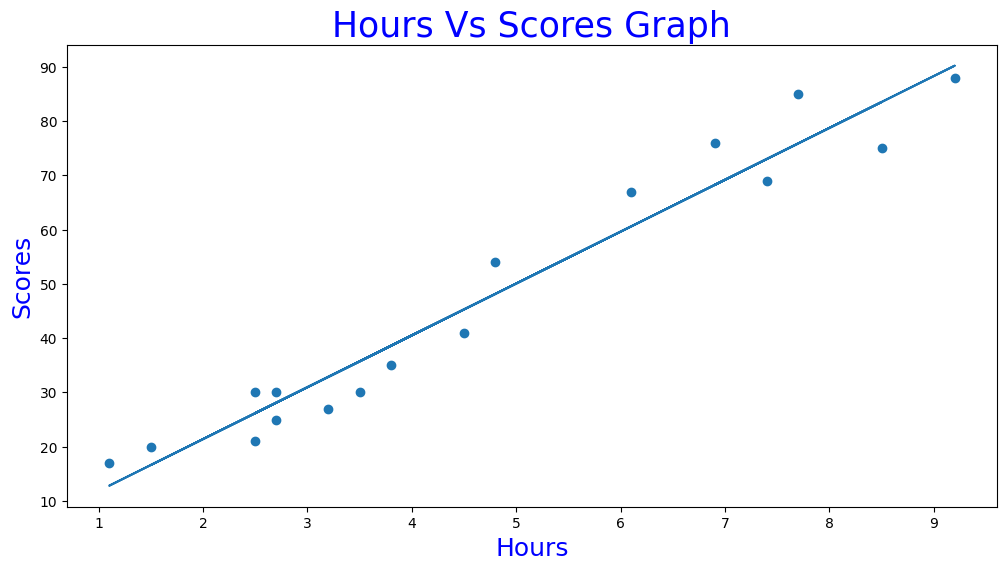

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predict_train)
plt.xlabel("Hours", fontdict={"color":"blue","fontsize":18})
plt.ylabel("Scores", fontdict={"color":"blue", "fontsize":18})
plt.title("Hours Vs Scores Graph", fontdict={"color":"blue","fontsize":25})

### Making Predictions : Test the model using the X_test

In [18]:
y_predict_test=lr.predict(X_test)
y_predict_test

array([81.60960819, 76.83070147, 51.02460522, 58.67085596, 87.34429624,
       54.84773059, 33.82054105, 20.43960225])

Text(0.5, 1.0, 'Hours Vs Scores Graph')

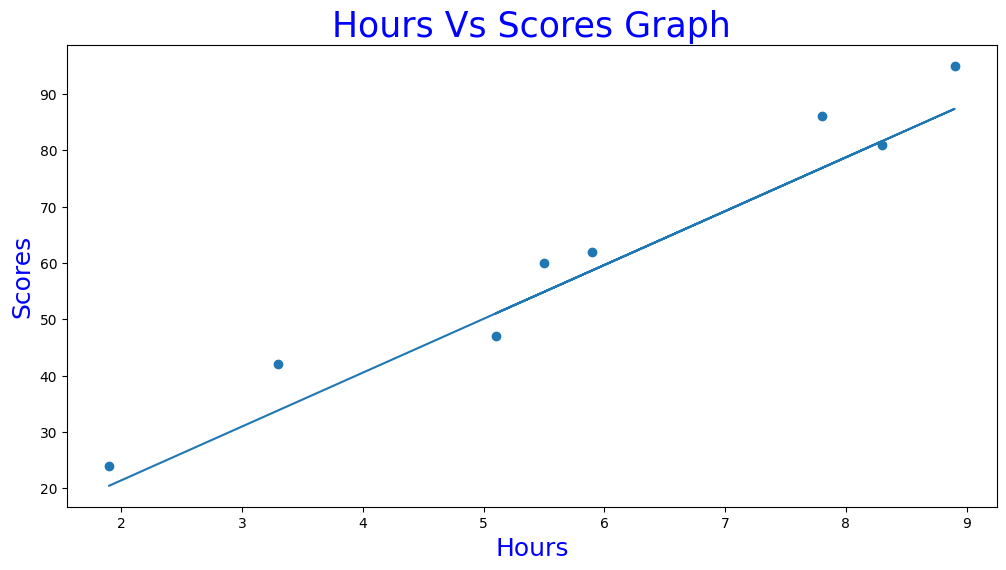

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict_test)
plt.xlabel("Hours", fontdict={"color":"blue","fontsize":18})
plt.ylabel("Scores", fontdict={"color":"blue", "fontsize":18})
plt.title("Hours Vs Scores Graph", fontdict={"color":"blue","fontsize":25})

### Comparison of actual vs predicted values

<Axes: >

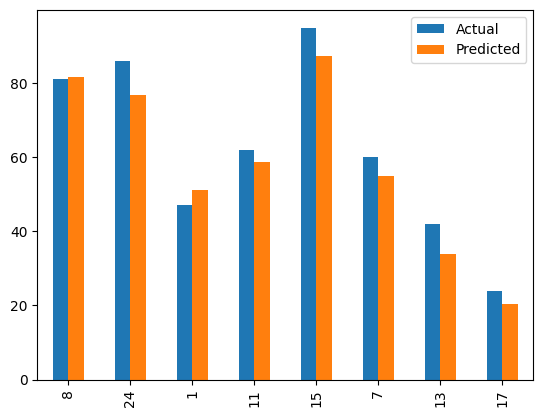

In [20]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict_test})
df
df.plot(kind='bar')

In [21]:
given_hour=9.25
given_hour_2D=np.array(given_hour).reshape(-1,1)
prediction=(lr.predict(given_hour_2D)).item()
print(f" The predicted score of a student for {given_hour} hrs/day is {prediction}")

 The predicted score of a student for 9.25 hrs/day is 90.68953094336179


### Evaluating the model using different metrics

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_test))


Mean Absolute Error: 5.210060728629452
Mean Squared Error: 34.55799570502566
